In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import sys

def show_curve_2(y1s, y2s, title, ylabel, isAcc=False):
    x = np.array(range(len(y1s)))
    y1 = np.array(y1s)
    y2 = np.array(y2s)
    plt.plot(x, y1, label='Training') # train
    plt.plot(x, y2, label='Validation') # test
    plt.axis()
    plt.title('{}'.format(title))
    plt.xlabel('Epoch')
    plt.ylabel('{}'.format(ylabel))
    
    if isAcc is True:
        plt.yticks(np.linspace(0, 1, 11))

    plt.legend(loc='best')
    plt.grid()
    plt.show()
    # plt.savefig("{}.svg".format(ylabel))
    plt.close()

def get_data_from_log(name):
    """
    get accuracy and loss from log file
    """
    # train_accs = []
    # val_accs = []
    train_losses = []
    val_losses = []
    with open('exp/{}/exp.log'.format(name), 'r') as f:
        for line in f.readlines():
            line = line.strip()

            # train = re.findall(r'Train.*Acc:.*\((.*)\%\)', line)
            # if len(train) > 0:
            #     train_accs.append(float(train[0]) / 100)

            # val = re.findall(r'Val.*Acc:.*\((.*)\%\)', line)
            # if len(val) > 0:
            #     val_accs.append(float(val[0]) / 100)

            train_loss = re.findall(r'Train Loss: (.*)', line)
            if len(train_loss) > 0:
                train_losses.append(float(train_loss[0]))
            
            val_loss = re.findall(r'Val.*Loss: (.*)', line)
            if len(val_loss) > 0:
                val_losses.append(float(val_loss[0]))
    # return train_accs, val_accs, train_losses, val_losses
    return train_losses, val_losses

In [2]:
# print(argv)
# train_accs, val_accs, train_losses, val_losses = get_data_from_log(argv[0])
# show_curve_2(train_accs, val_accs, 'Accuracy', 'Accuracy', True)
#     show_curve_2(train_losses, val_losses, 'Loss', 'Loss', False)

train_losses, val_losses = get_data_from_log("brains18=0313-184237")
print(train_losses, val_losses)
len(train_losses)

[1.2773, 0.4972, 0.3461, 0.2959, 0.2782, 0.2486, 0.2328, 0.2193, 0.2071, 0.1853, 0.1718, 0.1616, 0.1592, 0.1487, 0.1441, 0.1955, 0.1894, 0.1325, 0.1286, 0.1352, 0.1225, 0.117, 0.1208, 0.1117, 0.1088, 0.1091, 0.1053, 0.1057, 0.1039, 0.1, 0.1017, 0.099, 0.0975, 0.0985, 0.1025, 0.0952, 0.0906, 0.09, 0.086, 0.0851, 0.0846, 0.082, 0.0831, 0.0829, 0.0808, 0.0792, 0.08, 0.0764, 0.0819, 0.0775, 0.0754, 0.0754, 0.0757, 0.075, 0.0729, 0.0764, 0.0723, 0.0705, 0.0733, 0.0712, 0.069, 0.0694, 0.0675, 0.0689, 0.0713, 0.0667, 0.0686, 0.0654, 0.0659, 0.0666, 0.0638, 0.0652, 0.066, 0.0675, 0.0634, 0.0624, 0.0647, 0.0665, 0.0643, 0.0618, 0.0602, 0.064, 0.0618, 0.0589, 0.0599, 0.0589, 0.0583, 0.0603, 0.0574, 0.0621, 0.0577, 0.057, 0.0587, 0.0568, 0.0566, 0.0557, 0.0775, 0.0561, 0.0548, 0.0561, 0.0562, 0.0561, 0.0523, 0.0535, 0.056, 0.0544, 0.0555, 0.0523, 0.0523, 0.0523, 0.0518, 0.0603, 0.0511, 0.0528, 0.051, 0.0534, 0.0514, 0.0659, 0.0509, 0.0521, 0.0494, 0.0491, 0.0494, 0.0528, 0.0498, 0.0495, 0.0487, 0

316

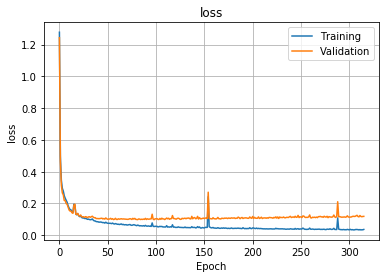

In [3]:
show_curve_2(train_losses, val_losses, "loss", "loss", isAcc=False)